# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

Está base de dados contém a contagem horária e diária de bicicletas de aluguel, entre os anos de 2011 e 2012 no sistema Capital bikeshare com as informações meteorológicas e sazonais correspondentes.

Os sistemas de compartilhamento de bicicletas (SBCs) são um meio de alugar bicicletas em que o processo de obtenção de associação, locação e devolução de bicicletas é automatizado por meio de uma rede de locais de quiosques em toda a cidade. Usando esses sistemas, as pessoas podem alugar uma bicicleta de um local e devolvê-la em um local diferente conforme necessário. Atualmente, existem mais de 500 programas de compartilhamento de bicicletas em todo o mundo.

Os dados gerados por esses sistemas os tornam atraentes para os pesquisadores porque a duração da viagem, o local da partida, a localização da chegada e o tempo decorrido são explicitamente registrados. Os sistemas de compartilhamento de bicicletas, portanto, funcionam como uma rede de sensores, que pode ser usada para estudar mobilidade em uma cidade.

Sempre gostei muito de bicicletas e me lembro até hoje quando aprendi a andar há muitos anos atrás, por isso esta base de dados dos SCBs me chamou muito atenção a atenção. Meu objetivo com este projeto é fazer dois notebooks, o primeira será apenas para fazer nossa análise exploratória e entender algumas coisas, no segundo vou fazer as transformações e modelagens necessárias para que eu consiga criar um modelo para previsão da demanda dos alugueis das bicicletas. [Acesse aqui](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset) o conjunto de dados que está disponível no repositório UCI, ou no site do [Kaglee](https://www.kaggle.com/c/bike-sharing-demand/data).

<br />
<hr />
<br />

**Características básicas da base:**

- instant: índice de registro
- dteday: data
- season: estação (1: inverno, 2: primavera, 3: verão, 4: outono)
- yr: ano (0: 2011, 1: 2012)
- mnth: mês (1 a 12)
- hr: hora (0 a 23)
- holiday: o dia com clima é feriado ou não.
- weekday: dia da semana
- workingday: se o dia for final de semana ou feriado, será 0, caso contrário será 1.
- weathersit: tempo
  - 1: limpo, poucas nuvens, parcialmente nublado, parcialmente nublado
  - 2: névoa + nublado, névoa + nuvens partidas, névoa + poucas nuvens, névoa
  - 3: neve fraca, chuva fraca + trovoada + nuvens dispersas, chuva fraca + nuvens dispersas
  - 4: chuva forte + paletes de gelo + trovoada + névoa, neve + nevoeiro
- temp: temperatura normalizada em graus Celsius. Os valores são derivados de (t-t_min) / (t_max-t_min), t_min = -8, t_max = + 39 (apenas na escala horária)
- atemp: temperatura normal de sensação em graus Celsius. Os valores são derivados de (t-t_min) / (t_max-t_min), t_min = -16, t_max = + 50 (apenas na escala horária)
- hum: umidade normalizada. Os valores são divididos em 100 (máximo)
windspeed: velocidade do vento normalizada. Os valores são divididos em 67 (máximo)
- casual: número de usuários casuais
- registered: número de usuários registrados
- cnt: contagem do total de bicicletas alugadas, incluindo bicicletas casuais e registradas

<br />
<hr />
<br />

Resumo   | Características
--------- | ------
Features do Dataset | Univariada
Número de registros | 17389
Área | Social
Características dos atributos | Inteiro, Real
Número de atributos | 16
Data de doação | 20-12-2013
Tarefa associada | Regressão
Valores ausentes | Não tem
Número de acessos na Web | 492617

<br />



### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


### **Minhas Hipoteses:**

- Durante os dias, quais horários costumam acontecer mais registros de alugueis?
- O aumento no registro de alugueis aumenta em feriados?
- Em quais estações do ano as pessoas costumam alugar mais as bicicletas?
- Quais meses possuem uma maior registro e alugueis?

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

**Importando as bibliotecas, carregando e visualizando a base de dados:**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

df = pd.read_csv('bike_rental_hour.csv', parse_dates=['dteday'])

df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Informações estatísticas da base:**

In [35]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


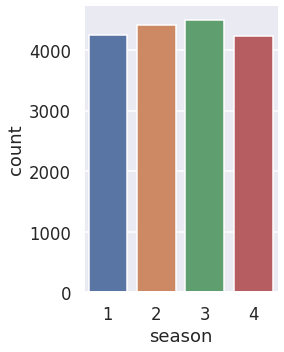

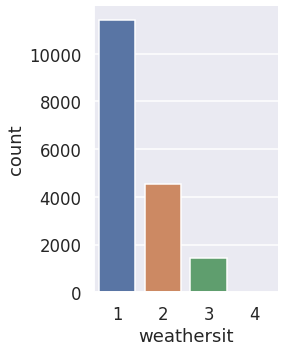

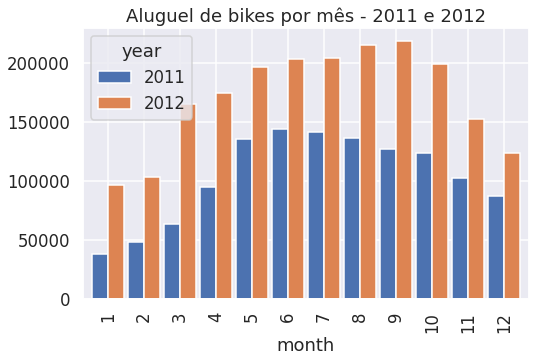

In [37]:
# SEASON
print(df.season.value_counts())
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=0.75)

# WEATHER
df.weathersit.value_counts()
sns.factorplot(x='weathersit',data=df,kind='count',size=5,aspect=0.75)  

# ALUGUEL DE BICILETAS POR MÊS EM 2011 E 2012
def plot_by_year(agg_attr, title):
    dd = df.copy()
    dd['year'] = df.dteday.dt.year
    dd['month'] = df.dteday.dt.month
    dd['hour'] = df.dteday.dt.hour

    by_year = dd.groupby([agg_attr, 'year'])['cnt'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(8,5), width=0.9, title=title)


plot_by_year('month', "Aluguel de bikes por mês - 2011 e 2012");

**Criação de quatro colunas para facilitar o entendimento da análise exploratória posteriormente:**

In [38]:
df['estacoes'] = df.season.map({1: 'inverno ', 2 : 'primavera', 3 : 'verao', 4 : 'outono'})
df['dias'] = df.weekday.map({0: 'segunda',1 : 'terça',2: 'quarta', 3 : 'quinta', 4 :'sexta',5:'sábado',6:'domingo' })
df["meses"] = df.mnth.map({1 : "janeiro", 2 : "fevereiro",3 : "março", 4 : "abril", 5 : "maio",6 : "junho",7 :"julho",8 : "agosto", 9 :"setembro", 10 : "outubro",11:"novembro",12: "dezembro"})
df['ano'] = df.yr.map({0:"2011",1:"2012"})

### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

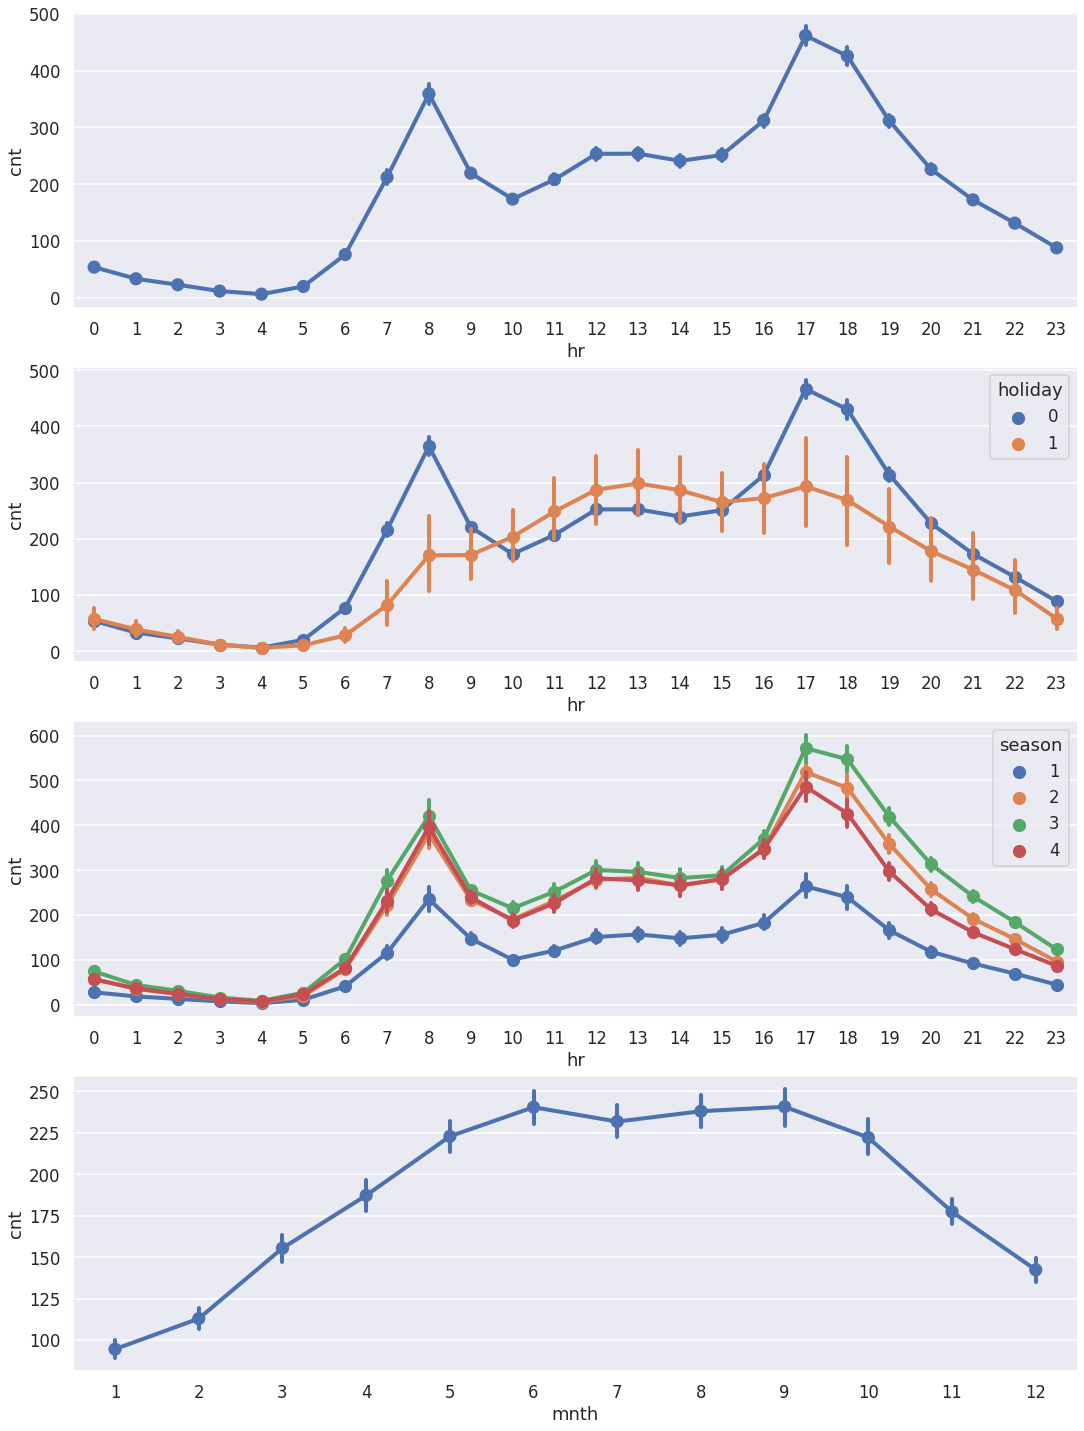

In [39]:
# Código para efetuar o plot dos 4 gráficos que iremos utilizar

fig,(ex1, ex2, ex3, ex4) = plt.subplots(nrows=4)
fig.set_size_inches(18,25)

sns.pointplot(data=df, x='hr', y= 'cnt', ax=ex1)
sns.pointplot(data=df, x='hr', y= 'cnt', hue='holiday', ax=ex2)
sns.pointplot(data=df, x='hr', y= 'cnt', hue='season', ax=ex3)
sns.pointplot(data=df, x='mnth' , y= 'cnt' ,ax=ex4)

# Gráfico 1: Mostra a distribuição dos alugueis por hora.
# Gráfico 2: Mostra a distribuição de alugueis por hora em feriados e dias comuns.
# Gráfico 3: Distribuição dos alugueis por estação
# Gráfico 4: Distribuição dos alugueis por mês.

O ex1 irá nos mostrar a distribuição dos emprestimos por hora, o ex2 a mesma coisa, porém, também irá mostrar essa distribuição em dias que são e não são feriados, o ex3 irá nos mostrar os emprestimos de bicicleta por estação e o ex4 a distribuição dos emprestimos por mês.

Os gráfico nos mostra que às 08, 17 e 18 horas em dias que não são feriados são os horários onde ocorrem o maior número de emprestimo. Em dias que são feriados conseguimos ver uma maior distribuição às 12, 13 horas.

Como se é de imaginar, geralmente em estações mais quentes ocorrem uma maior frequência de emprestimos, até por que ninguém gostaria de se molhar. Mas também em dias chuvosos possuem certa distribuição nos horários mencionados, alugar uma bicicleta pode ser uma boa forma de se locomover rapidamente em dia chuvoso quando se está a pé.

Text(0.5, 0, 'Meses')

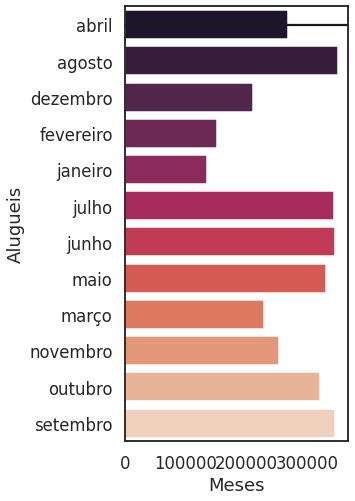

In [40]:
# Código utilizado para extrair os alugueis por mês e plotar.

sns.set(style='white', context='talk')
f, (ex1) = plt.subplots(1, 1, figsize=(4, 8), sharex=True)

best_month = df.groupby('meses').sum().reset_index()

x = best_month['meses']
y1 = best_month ['cnt']

sns.barplot(x=y1, y=x, palette='rocket', ax=ex1) 
ex1.axhline(0, color="k", clip_on=False) 
ex1.set_ylabel("Alugueis")
ex1.set_xlabel('Meses')

# Gráfico que mostra o valor total dos alugueis feitos em cada mês.

Notamos que no mês de agosto mesmo com uma distribuição menor, o número total de bicicletas emprestadas no “pouco” que ele aparece em comparação aos outros 2 meses, é o suficiente para que ele os supere no quesito número total de emprestimos.

Agora podemos responder algumas perguntas do inicio: Qual ano teve o maior número de alugueis? Teve mais alugueis de bicicletas em feriados? Ocorrem mais alugueis de bicicletas em dias da semana ou em finais de semana?

Vamos ver nos gráficos abaixo:

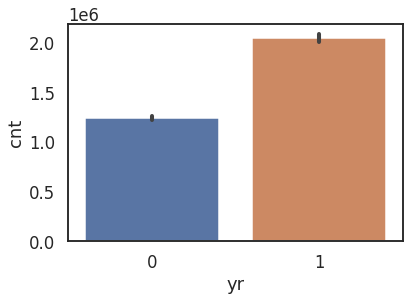

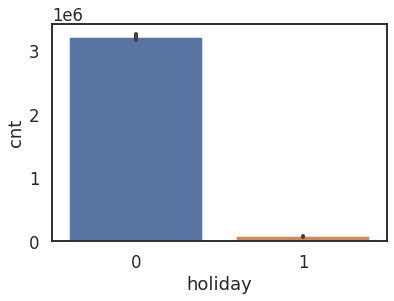

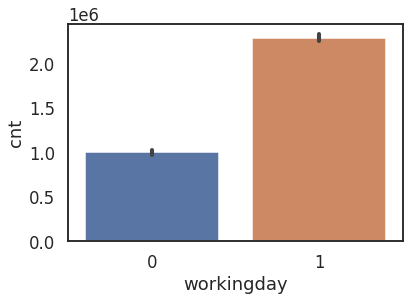

In [41]:
# Código utilizado para que seja plotado os gráficos referente ao ano, feriado e dias úteis.

Cols = ['yr', 'holiday','workingday']
for col in Cols:
  sns.barplot(x=col, y= 'cnt', data=df, estimator = sum) 
  plt.show()
  print("\n\n")

# Gráfico 2: 0 — Dia comum / 1 — Feriado
# Gráfico 3: 0 — Final de Semana / 1 — Dia útil

Com o plot acima conseguimos ver que dos 2 anos analisados, o que teve um maior número de alugueis de bicicleta foi em 2012.

Há um número maior de emprestimos em dias que não são feriados e em dias úteis,
se juntarmos essa informação com a distribuição das horas do dia em que ocorrem uma frequência maior de alugueis, conseguimos deduzir novamente que muitas dessas pessoas utilizam as bicicletas como meio de ir e voltar do trabalho.

Vemos que em dias úteis possuem um número maior de bicicletas alugadas, porem, quais dos dias possuem o maior número de alugueis?

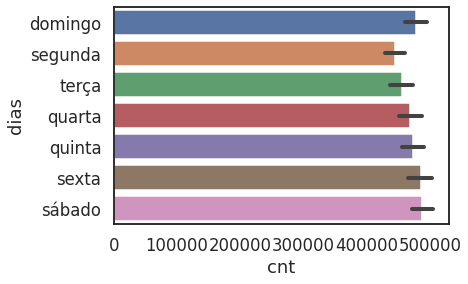

In [42]:
# Gráfico que mostra o valor total de alugueis por dia da semana

sns.barplot( x='cnt', y='dias', data=df, estimator = sum, orient= 'h')
plt.show()

Os dados podem surpreender, nós vimos que os dias úteis possuem um maior número de alugueis, no entanto, levando em consideração os 7 dias da semana, por mais que na totalidade dos alugueis os dias úteis ganhem, o dia em específico que possui a maior de alugueis é um sábado.

Como é importante olhar os detalhes dos dados, poderiamos deduzir olhando o outro gráfico que o dia que possui o maior número de emprestimo é provavelmente um dia útil, porem, os dias úteis venceram no gráfico anterior por que ele soma os alugueis durante todos os dias úteis e compara com os finais de semana, e nós temos 5 dias úteis para 2 finais de semana, por isso que no geral ficou na frente. 

No entanto a sequência dos 3 dias com maior número de emprestimo seria sábado, sexta e domingo. Qual ano se saiu melhor e porque? No ano de 2012 teve um número bem maior de emprestimos de bicicleta, por que será?

Nós vimos que o maior número de emprestimo se dá no verão, ou seja, tempo ensolarado, será que em 2011 teve um número maior de dias com tempo chuvosos ou nublados o que diminuiu o número de alugueis ou será que essa diferença não se deve a algo descrito na nossa base de dados? 

Vamos ver agora o que os dados nos diz. Para ficar mais organizado vamos separar nossa base de dados, uma que possua apenas o ano de 2011 e outra que possua 2012.

In [43]:
months2011 = df[df['ano'] == '2011']
months2012 = df[df['ano'] == '2012']

Podemos fazer uma contagem dos valores e comparar os resultados.

In [44]:
print(months2011['weathersit'].value_counts())	
print(months2012['weathersit'].value_counts())

1    5645
2    2218
3     781
4       1
Name: weathersit, dtype: int64
1    5768
2    2326
3     638
4       2
Name: weathersit, dtype: int64


O valor 1 representa um dia limpo e o valor 3 representa chuva fraca, ou seja,
em 2011 o número de dias que tiveram uma chuva pelo menos fraca foi maior do que o de 2012 e 2011 também teve menos dias ensolarados, portanto, isso pode ter influenciado pelo menos em parte no fato de ter ocorrido menos emprestimos.
Será que há um padrão?
Por último, será que há um padrão no número de alugueis de bicicletas por mês? Será que os meses que tiveram maior índice de alugueis em 2011 são os mesmos que de 2012?

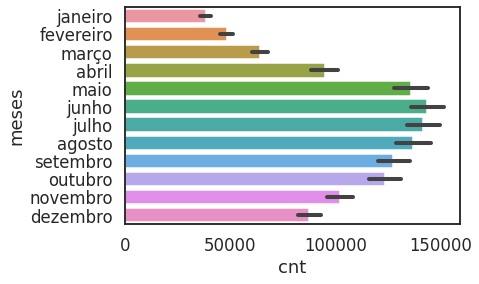

In [45]:
# Número de alugueis nos meses de 2011

sns.barplot(x= 'cnt', y= 'meses', data=months2011, estimator = sum, orient= 'h')
plt.show()

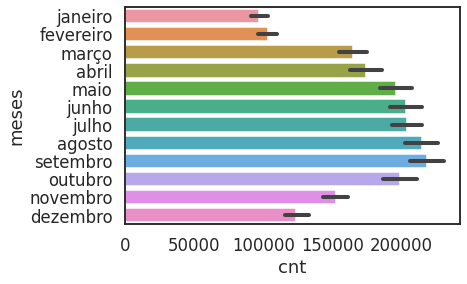

In [46]:
# Número de alugueis nos meses de 2012

sns.barplot(x= 'cnt', y= 'meses', data=months2012, estimator = sum, orient= 'h')
plt.show()

Concluí-se que para 2011 a ordem ficou mês junho, julho, agosto e maio respectivamente, já em 2012 a ordem foi setembro, agosto, julho, junho, portanto, não há um padrão bem definido, o pico dos alugueis foram em meses diferentes mas alguns meses se mantiveram no top 4,mês julho e agosto.

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

Será utilizado um algoritmo de Random Forest para fazer a regressão afim de prever a quantidade de bicicletas alugadas. 

A Regressão é uma técnica que busca entender a relação de uma variável dependente(variável de resposta) com variáveis independentes.

Nesse tipo de problema o valor que iremos predizer será sempre contínuo. 

**cnt**: Contagem do total de bicicletas emprestadas, incluindo bicicletas casuais e registradas. (variável target)

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


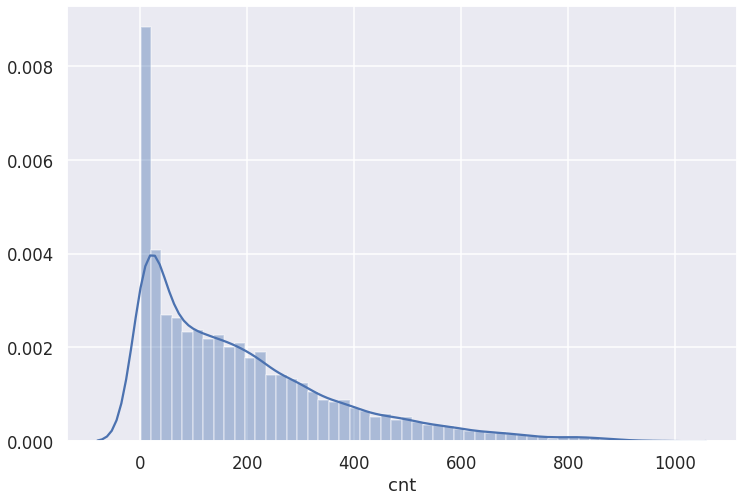

In [50]:
df = pd.read_csv('bike_rental_hour.csv')

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df.cnt)

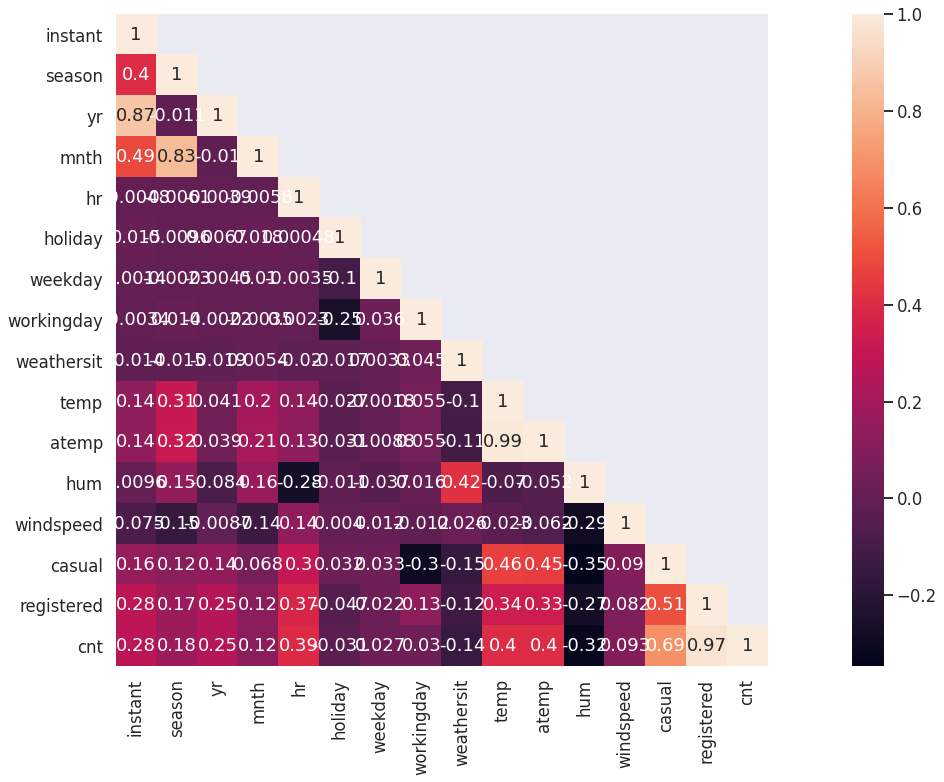

In [51]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Pela matriz de confusão podemos inferir:

a) A relação entre uma característica e ela mesma é igual a 1 (esperado);

b) temp e atemp são altamente correlacionadas (esperado);

c) humidity e count são negativamente correlacionadas, o que reforça o fato
de as pessoas demandarem menos bicicletas quando há umidade elevada;

d) casual e working day são fortemente correlacionadas de forma inversa

e) count e holiday são altamente correlacionadas de forma inversa

f) temp(ou atemp) tem alto impacto sobre count.

g) weather e count são altamente correlacionados de forma inversa. Isso é consequência de a característica weather ser medida de 1 até 4. Na medida em que as condições climáticas se tornam menos favoráveis, o n. de bicicletas alugadas diminui.

h) registered, casual e count são altamente correlacionadas (de forma positiva) isso sugere que as bicicletas que são alugadas também são registradas.

In [52]:
correlations = df.corr()
correlations['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

**Excluindo os atributos que são subcategorias do atributo alvo: casual, registered é do tipo date:**

In [53]:
columns = df.columns.drop(['cnt', 'casual', 'dteday', 'registered'])

columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


Calculo do erro médio quadrático. O mean_squared_error é a diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar. O valor dessa métrica varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[columns],df['cnt'], test_size=0.20, random_state=42)

5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


In [55]:
# Instanciando o algoritmo:
tree_rf = RandomForestRegressor()

# Treinando o algoritmo e gerando o modelo:
model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

In [56]:
# Calculando o erro médio quadrático:
mean_squared_error(y_test, resultado_rf)

1644.6047550345224

In [57]:
# Computando o Score:
model_rf.score(X_test,y_test)

0.9480630541141567

In [58]:
# Ajustando os hiperparametros do Random Forest
from sklearn.model_selection import GridSearchCV

# Especificando os parâmetros de tunning:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

In [59]:
# Instanciando o RandomForest e GridSearch:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)

In [ ]:
# Executando o grid:
grid.fit(X_train, y_train)

In [ ]:
# Verificando os melhores parâmetros:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 750}

In [ ]:
# Recuperando o melhor estimator:
rf_best = grid.best_estimator_

In [ ]:
# Gerando o resultado final:
resultado_final = rf_best.predict(X_test)

In [ ]:
# Calculando o erro médio quadrático:
mean_squared_error(y_test, resultado_final)

1623.285641154328

In [ ]:
# Computando o Score:
rf_best.score(X_test,y_test)

0.9487363159787721

6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

In [ ]:
# Instanciando o algoritmo:
lr = LinearRegression()

In [ ]:
# Treinando o algoritmo e gerando o modelo de regressão:
model = lr.fit(X_train,y_train)

# Realizando a predição:
resultado = model.predict(X_test)

In [ ]:
# Calculando o erro médio quadrático:
mean_squared_error(y_test, resultado)

19376.952766955474

In [ ]:
# Computando o Score:
model.score(X_test,y_test)

0.3880719703569244

In [ ]:
# Comparando os resultados aplicando os dados de treinamento:
resultado_treino = model.predict(X_train)

mean_squared_error(y_train, resultado_treino)

model.score(X_train,y_train)

0.3888263676964571

Nesse modelo de regressão linear que é o tipo mais básico, temos um erro muito alto e um valor de score muito baixo, esses resultados não são nem um pouco satisfatórios. Um dos motivos é que temos muitos dados binários no conjunto de dados (0 e 1), os modelos de regressão linear tendem a funcionar melhor quando temos dados numéricos contínuos. Os modelos de árvore apresentam melhores resultados, conforme resultado do modelo Random Forest acima.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*

Foi testado dois algoritmos de regressão e analisado os seus respectivos resultados, esse era um dos objetivo.

Por essa razão decidi não me aprofundar muito na parte de pré-processamento dos dados.

Existem inúmeras técnicas que podem e devem ser testadas, como uma melhor normalização das features por exemplo.

Mas reforçando o que foi escrito acima, não é sempre que esse tipo de modelo de árvore dará os melhores resultados, tudo vai depender dos dados analisados.

Os modelos ensembles como o Random Forest tem a missão de resolver tipos de problemas de sobreajuste, e por isso apresenta resultados satisfatório.

Seu funcionamento é bem simples, ele usa várias árvores de decisão e pega o valor que cada uma das árvores, o resultado final vai ser o valor médio dessas árvores.